# Test new rdkit_easy functions for highlighting substructures in molecule depictions

In [1]:
import importlib as imp
import sys
import os
import pdb
import numpy as np
import pandas as pd

import atomsci.ddm.utils.rdkit_easy as rdk

from rdkit import Chem


In [2]:
rdk.setup_notebook()

Loading BokehJS ...

In [3]:
aniline_smarts = 'c1cc([NH2])ccc1'
aniline_patt = Chem.MolFromSmarts(aniline_smarts)

## Read in a test dataset. Half the molecules in the dataset contain an aniline group and half don't.

In [4]:
example_file = os.path.join(os.path.dirname(os.path.dirname(rdk.__file__)), 'test', 'test_datasets', 'highlight_smarts_test_data.csv')
example_df = pd.read_csv(example_file)

## Add Mol objects for each SMILES string

In [5]:
example_df['mol'] = [Chem.MolFromSmiles(s) for s in example_df.SMILES.values]

## Make a table with two versions of the structure, one plain and the other with the aniline highlighted. Do this with the images embedded and in external files, with SVG and PNG formats

In [6]:
plain_svg_embed_html = [rdk.mol_to_html(mol, type='svg', embed=True) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
plain_png_embed_html = [rdk.mol_to_html(mol, type='png', embed=True) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
plain_svg_ext_html = [rdk.mol_to_html(mol, name=f"{id}.svg", directory='test_plain_rdkit_svg', type='svg', 
                        embed=False) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
plain_png_ext_html = [rdk.mol_to_html(mol, name=f"{id}.png", directory='test_plain_rdkit_png', type='png', embed=False) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]

hilit_svg_embed_html = [rdk.mol_to_html(mol, highlight=aniline_patt, type='svg', embed=True) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
hilit_png_embed_html = [rdk.mol_to_html(mol, highlight=aniline_patt, type='png', embed=True) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
hilit_svg_ext_html = [rdk.mol_to_html(mol, highlight=aniline_patt, name=f"{id}.svg", directory='test_hilit_rdkit_svg', type='svg', 
                        embed=False) 
                    for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]
hilit_png_ext_html = [rdk.mol_to_html(mol, highlight=aniline_patt, name=f"{id}.png", directory='test_hilit_rdkit_png', type='png', 
                        embed=False) 
                     for id, mol in zip(example_df.compound_id.values, example_df.mol.values)]

## Draw the table with SVG images embedded in the notebook HTML. Note that the right hand structure will only show highlighting for molecules with `has_aniline == True`.

In [7]:
disp_df = example_df[['compound_id', 'has_aniline']].copy()

disp_df['plain_structure'] = plain_svg_embed_html
disp_df['structure_with_highlighting'] = hilit_svg_embed_html
rdk.show_df(disp_df)


,compound_id,has_aniline,plain_structure,structure_with_highlighting
0,206_1350,False,,
1,170_2203,True,,
2,226_229,False,,
3,230_908,True,,
4,216_788,False,,
5,224_302,True,,
6,183_234,False,,
7,241_94,False,,
8,197_1234,True,,
9,237_2140,True,,


## Draw the table with PNG images embedded in HTML

,compound_id,has_aniline,plain_structure,structure_with_highlighting
0,206_1350,False,,
1,170_2203,True,,
2,226_229,False,,
3,230_908,True,,
4,216_788,False,,
5,224_302,True,,
6,183_234,False,,
7,241_94,False,,
8,197_1234,True,,
9,237_2140,True,,

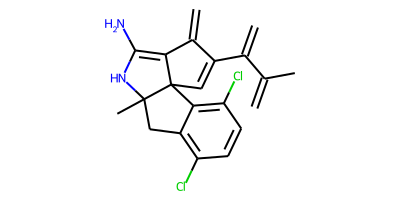
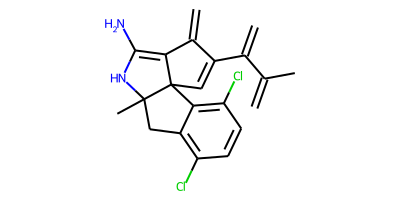
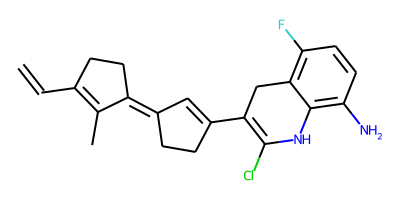
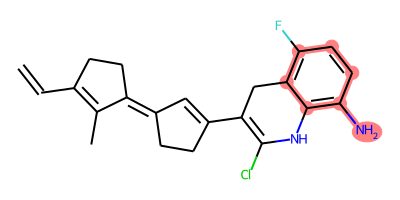
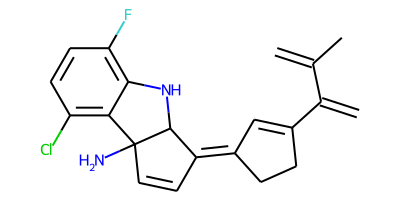
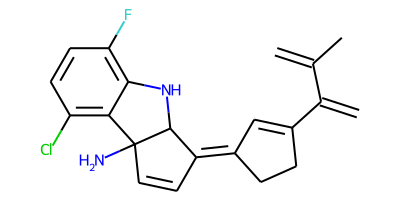
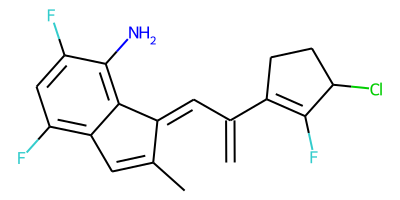
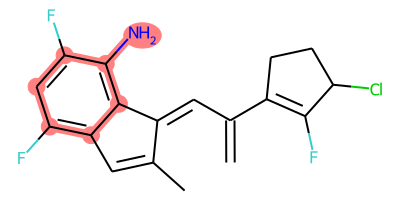
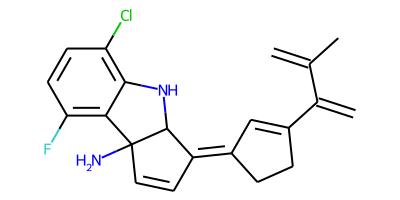
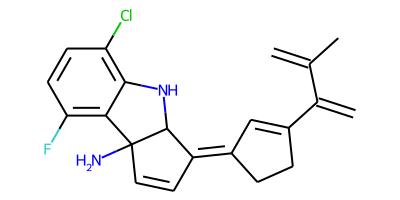
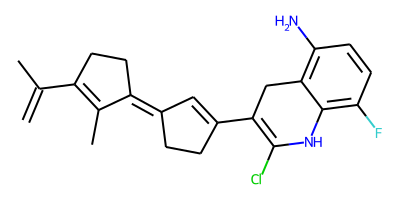
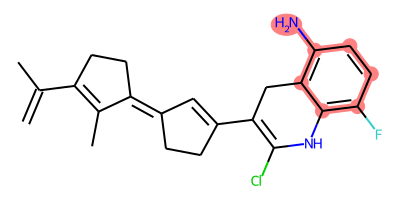
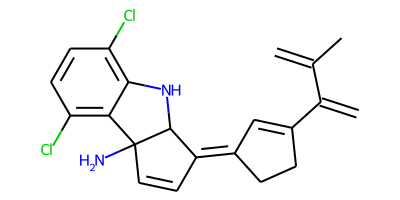
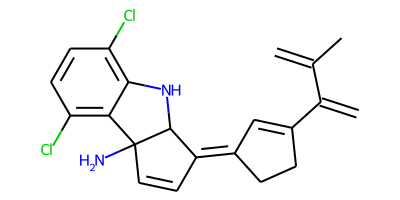
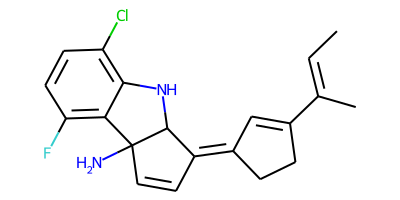
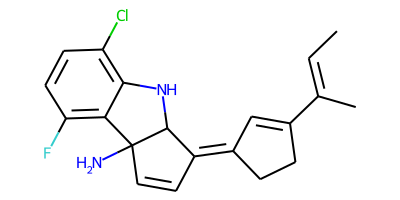
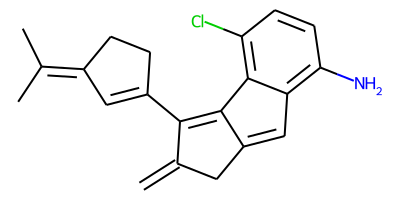
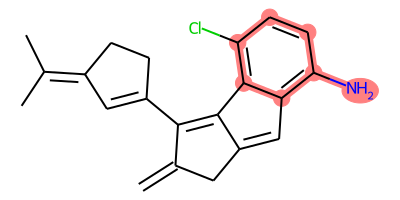
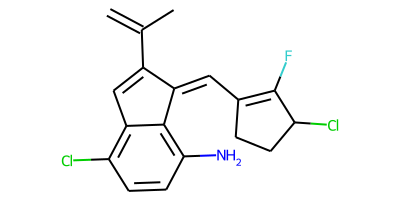
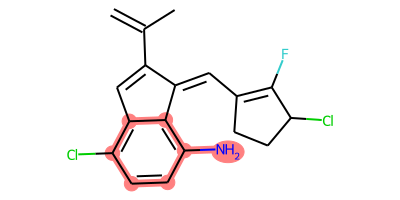

In [8]:
disp_df['plain_structure'] = plain_png_embed_html
disp_df['structure_with_highlighting'] = hilit_png_embed_html
rdk.show_df(disp_df)

## Draw a table with SVG images stored as external files

In [9]:
disp_df['plain_structure'] = plain_svg_ext_html
disp_df['structure_with_highlighting'] = hilit_svg_ext_html
rdk.show_df(disp_df)

,compound_id,has_aniline,plain_structure,structure_with_highlighting
0,206_1350,False,,
1,170_2203,True,,
2,226_229,False,,
3,230_908,True,,
4,216_788,False,,
5,224_302,True,,
6,183_234,False,,
7,241_94,False,,
8,197_1234,True,,
9,237_2140,True,,


## Draw a table with PNG images stored as external files

In [10]:
disp_df['plain_structure'] = plain_png_ext_html
disp_df['structure_with_highlighting'] = hilit_png_ext_html
rdk.show_df(disp_df)

,compound_id,has_aniline,plain_structure,structure_with_highlighting
0,206_1350,False,,
1,170_2203,True,,
2,226_229,False,,
3,230_908,True,,
4,216_788,False,,
5,224_302,True,,
6,183_234,False,,
7,241_94,False,,
8,197_1234,True,,
9,237_2140,True,,
